In [1]:
#import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load in wage data
minimum_wage_data = "Resources/Minimum Wage Data.csv"
#encoding error resolution
minimum_wage_df = pd.read_csv(minimum_wage_data, encoding="ISO-8859-1")
#changing state name for coherence
minimum_wage_df.loc[(minimum_wage_df['State'] == 'District of Columbia'), 'State'] = 'DC'

minimmum_wage_by_state = minimum_wage_df.groupby(["State", "Year"])

In [3]:
# import cleaned unemployment data
unemployment_data = "Resources/clean_unemployment_data.csv"
unemployment_df = pd.read_csv(unemployment_data)
unemployment_df.loc[(unemployment_df['State'] == 'D.C.'), 'State'] = 'DC'

In [4]:
# filtered minimum wage data for years between 2009-2017
mw = minimum_wage_df.drop(["Table_Data", "Footnote"], 1)
cmw = mw[mw["Year"]>2008]

cmw.head()

,Year,State,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
2255,2009,Alabama,7.25,7.25,214.537,8.46,8.46
2256,2009,Alaska,7.15,7.15,214.537,8.35,8.35
2257,2009,Arizona,7.25,7.25,214.537,8.46,8.46
2258,2009,Arkansas,6.25,6.25,214.537,7.29,7.29
2259,2009,California,8.00,8.00,214.537,9.34,9.34


## Viewing data in plots to get a better sense

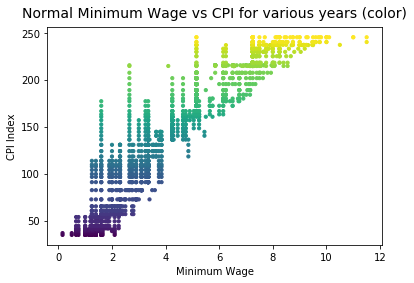

In [20]:
# created new dataframe to drop rows where minimum wage value is 0
mini_data = mw.replace({"High.2018"==0:None})
# Uemp_min_wage = Uemp_min_wage.replace({0: None})
mini_data1 = mini_data.dropna()

# goruping by state and year
# mini_data2 = mini_data1.groupby(["State" , "Year"])
# mini_data2.head()

plt.title("Normal Minimum Wage vs CPI for various years (color)", pad = 10, fontsize = 14)
plt.xlabel("Minimum Wage")
plt.ylabel("CPI Index")

c = mini_data1["Year"]
plt.scatter(mini_data1["High.Value"], mini_data1["CPI.Average"], c=c, s=10)
plt.savefig("plots/Actual Min wage with CPI.png")
plt.show()

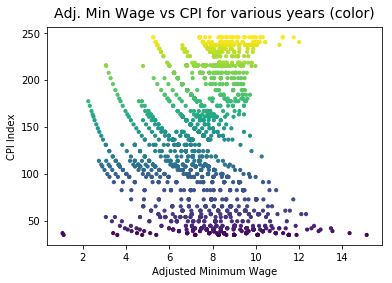

In [21]:
plt.xlabel("Adjusted Minimum Wage")
plt.ylabel("CPI Index")
plt.title("Adj. Min Wage vs CPI for various years (color)", pad = 10, fontsize = 14)
c = mini_data1["Year"]
plt.scatter(mini_data1["High.2018"], mini_data1["CPI.Average"], c=c, s=10)
plt.savefig("plots/Adjusted minimum wage vs CPI.png")
plt.show()

In [7]:
# Merging data frames
Uemp_min_wage = pd.merge(unemployment_df, cmw, how="left", on=["Year", "State"])
#type(Uemp_min_wage["Year"][0])

Uemp_min_wage = Uemp_min_wage.replace({0: None})
Uemp_min_wage.sort_values('High.2018')

,State,Year,Avg UI,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
16,Kansas,2009,6.6,2.65,2.65,214.537,3.09,3.09
39,Puerto Rico,2009,15,4.1,4.1,214.537,4.79,4.79
426,Georgia,2017,4.8,5.15,5.15,245.12,5.26,5.26
466,Wyoming,2017,4.2,5.15,5.15,245.12,5.26,5.26
374,Georgia,2016,5.4,5.15,5.15,240.007,5.37,5.37
414,Wyoming,2016,5.3,5.15,5.15,240.007,5.37,5.37
363,Wyoming,2015,4.1,5.15,5.15,237.017,5.44,5.44
322,Georgia,2015,6,5.15,5.15,237.017,5.44,5.44
311,Wyoming,2014,4.3,5.15,5.15,236.736,5.45,5.45
270,Georgia,2014,7.4,5.15,5.15,236.736,5.45,5.45


In [8]:
# read in the crime data
crime_data = "Resources/crimetotal.csv"

crime_df = pd.read_csv(crime_data)
crime_df1 = crime_df.dropna()
crime_df1["Year"]=crime_df1['Year'].astype(int)
crime_df1

#state name coherence
crime_df1.loc[(crime_df1['State'] == 'D.C.'), 'State'] = 'DC'

#merging all data 
cleaned = pd.merge(Uemp_min_wage, crime_df1, how="left", left_on=["Year","State"], right_on=["Year", "State"])


C:\Users\skq1922\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\skq1922\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [9]:
# cleaning final dataframe
data = cleaned.drop(["Unnamed: 0"], axis=1)
data.sort_values('Avg UI')
#exporting the csv for final version
# data.to_csv("Resources/data.csv")

,State,Year,Avg UI,High.Value,Low.Value,CPI.Average,High.2018,Low.2018,Total Crime Rate
427,Hawaii,2017,2.4,9.25,9.25,245.12,9.45,9.45,NaN
450,North Dakota,2017,2.6,7.25,7.25,245.12,7.41,7.41,NaN
294,North Dakota,2014,2.7,7.25,7.25,236.736,7.67,7.67,4750.8
445,New Hampshire,2017,2.7,7.25,7.25,245.12,7.41,7.41,NaN
421,Colorado,2017,2.8,9.3,9.3,245.12,9.5,9.5,NaN
339,Nebraska,2015,2.8,8,8,237.017,8.45,8.45,NaN
393,New Hampshire,2016,2.9,7.25,7.25,240.007,7.56,7.56,NaN
346,North Dakota,2015,2.9,7.25,7.25,237.017,7.66,7.66,NaN
443,Nebraska,2017,2.9,9,9,245.12,9.19,9.19,NaN
405,South Dakota,2016,3,8.55,8.55,240.007,8.92,8.92,NaN


In [10]:
# data.head()